In [3]:
from collections import Counter, namedtuple
import matplotlib.pyplot as plt
from tqdm import tqdm
from random import choice
import numpy as np
import string
import math
import heapq 
import time

In [4]:
class Node(namedtuple('Node', ['left', 'right'])):
    def walk(self, code, acc):
        self.left.walk(code, acc + '0')
        self.right.walk(code, acc + '1')

In [5]:
class Leaf(namedtuple('leaf', ['char'])):
    def walk(self, code, acc):
        code[self.char] = acc or '0'

In [121]:
def huffman_encode(s):
    ch_list = list(Counter(s).items())
    count = len(ch_list)
    h = []
    for i in range(count):
        h.append((ch_list[i][1], i, Leaf(ch_list[i][0]))) 
    heapq.heapify(h)
    
    while len(h) > 1:
        freq1, _count1, left = heapq.heappop(h)
        freq2, _count2, right = heapq.heappop(h)
        heapq.heappush(h, (freq1 + freq2,count, Node(left, right)))
        count +=1
    
    code = {}
    if h:
        [(_freq, _count, root)] = h
        root.walk(code, '')
    return code

In [111]:
len_list = []
time_list = []

k_list = np.arange(1000, 500000, 1000)

for k in tqdm(k_list):
    x = ''.join(choice(string.printable) for i in range(k))
    len_list.append(len(x))
    t0 = time.time()*1000
    code = huffman_encode(x)
    t1 = time.time()*1000 - t0
    time_list.append(t1)

100%|████████████████████████████████████████████████████████████████████████████████| 499/499 [00:44<00:00, 11.34it/s]


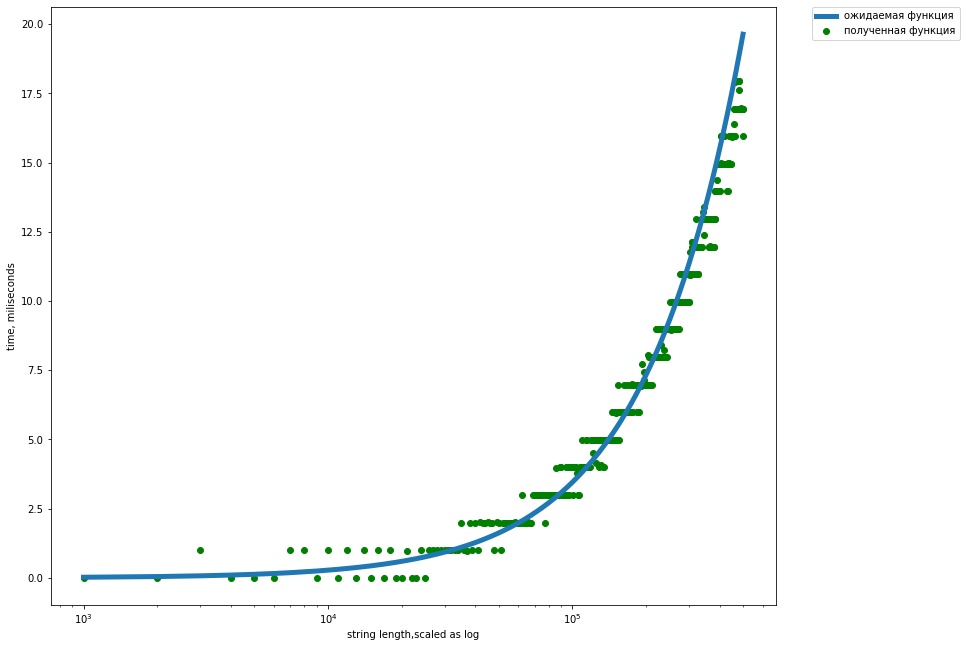

In [112]:
x = len_list
y = time_list

fig, ax = plt.subplots(figsize=(13,11))
ax.scatter(x, y, c="g", label='полученная функция')
ax.plot(x, [0.000003*math.log(k)*k for k in k_list], label='ожидаемая функция', linewidth=5)
ax.set(xlabel = "string length,scaled as log", ylabel="time, miliseconds")
ax.set_xscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [135]:
len_list = []
time_list = []
x = ''.join(choice(string.printable) for i in tqdm(range(246913578)))
len_list.append(len(x))
for i in tqdm(range(100)):
    t0 = time.time()*1000
    code = huffman_encode(x)
    t1 = time.time()*1000 - t0
    time_list.append(t1)
print(np.mean(time_list)) 

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [15:01<00:00,  9.02s/it]

9014.74078125


In [122]:
for i in range(100):
    t0 = time.time()*1000
    code = huffman_encode(x)
    t1 = time.time()*1000 - t0
    time_list.append(t1)
print(np.mean(time_list))

1065.8966833496095


In [117]:
n = 1466000
print((n*2*math.log(2*n))/(n*math.log(n)))

2.0976397843814882
